In [9]:
# Para no tener que reiniciar el kernel
%load_ext autoreload
%autoreload 2

# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np
import pickle

# Visualizaciones
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt

# Para realizar la clasificación y la evaluación del modelo
# -----------------------------------------------------------------------
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [10]:
import sys
import os
sys.path.append(os.path.abspath('../'))

In [11]:
# Librería para el acceso a variables y funciones
# -----------------------------------------------------------------------

from src import soporte_ajuste_logistica as sal
from src import soporte_logistica_ensamble as sle


In [12]:
import warnings
warnings.filterwarnings("ignore")

In [13]:
df = pd.read_pickle('../datos/datos_preprocesados_y_desbalanceados.pkl')

In [14]:
df.head()

,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,Age,BusinessTravel,Department,DistanceFromHome,EducationField,JobRole,MaritalStatus,...,JobLevel_Head,JobLevel_Intern,JobLevel_Junior,JobLevel_Manager,JobLevel_Senior,StockOptionLevel_Bad,StockOptionLevel_Best,StockOptionLevel_Better,StockOptionLevel_Good,Attrition
0,0.0,-0.9757428617518955,1.0,1.153846,0.0,-1.0,-0.083333,0.533045977011493,-0.4637062838161343,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.4248750185616,-0.384615,0.09952892067107169,0.0,0.250000,0.533045977011493,0.5238411596221293,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
2,0.7658035397332527,0.0,6.8505006797942904,-0.307692,0.09952892067107169,0.0,0.833333,-4.206791420725185,0.1773559143770109,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,-0.23419646026674737,-0.9757428617518955,0.0,0.153846,-0.06956855225311602,0.0,-0.416667,0.533045977011493,-0.7459473750454625,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,-0.23419646026674737,1.2600378155516458,0.0,-0.307692,0.0,0.0,0.250000,0.0,0.1773559143770109,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [15]:
df = df.astype(float)

### REGRESIÓN LOGÍSITICA

In [16]:
logistica = sle.AnalisisModelosClasificacion(dataframe = df, variable_dependiente = "Attrition")

# llamamos a la función para ajustar el modelo
logistica.ajustar_modelo("logistic_regression")

# llamamos al metodo para obtener los resultaods de las predicciones
df_resultados_regresion = logistica.calcular_metricas(modelo_nombre = "logistic_regression")
df_resultados_regresion

,accuracy,precision,recall,f1,kappa,auc,time_seconds,n_jobs,tiempo_computacion(segundos),nucleos_usados
train,0.744728,0.744749,0.744728,0.744709,0.489406,0.826677,0.012983,NaN,NaN,NaN
test,0.755102,0.756995,0.755102,0.754950,0.510784,0.834961,NaN,NaN,0.012983,NaN


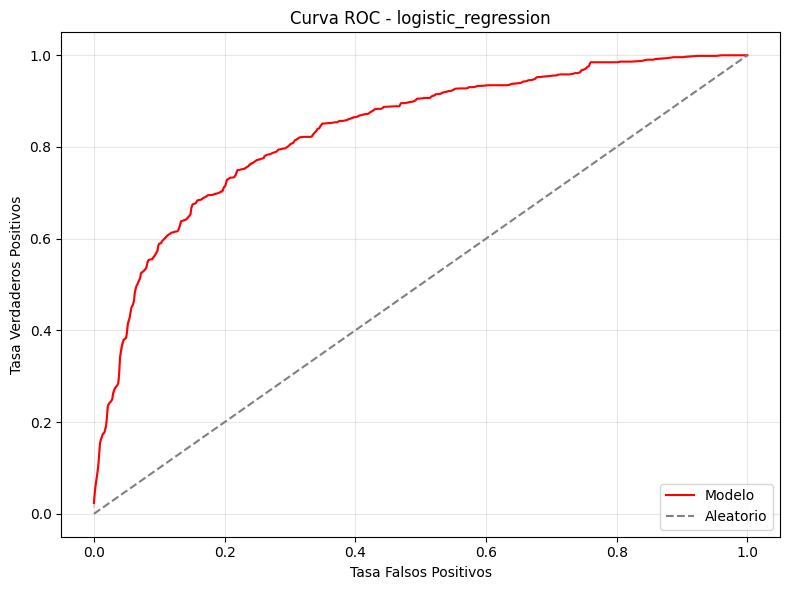

In [17]:
logistica.plot_curva_roc("logistic_regression")

### DECISION TREE